In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../')
from branchcut.setup import wrap

In [2]:
def unwrap_itoh_1D(phase):
    out = np.zeros(len(phase))
    out[0]=phase[0]
    for i in range(1,len(phase)):
        diff = phase[i] - phase[i-1]
        Delta = np.arctan2(np.sin(diff),np.cos(diff))
        out[i]=out[i-1]+Delta
    return out


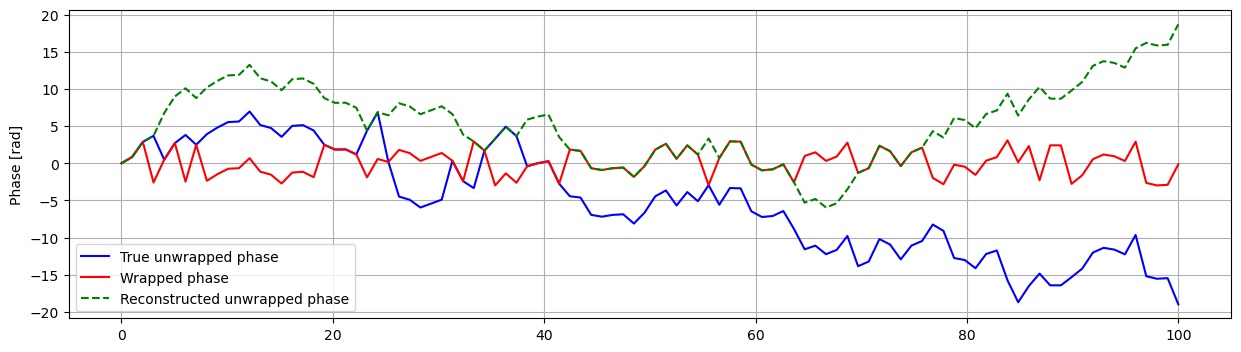

In [3]:
# Making Brownian motion plot
rng = np.random.default_rng(1)
points = 100
mu, sigma = 0.0, (0.5*np.pi)**2
Z = rng.normal(mu, sigma, points)

t_axis = np.linspace(0,points,points)
W = np.zeros(points)
             
for idx in range(points - 1):
    real_idx = idx + 1
    W[real_idx] = W[real_idx-1] +  Z[idx]

#  Wrapping
WW = wrap(W)

# Unwrapping
WWu = unwrap_itoh_1D(WW)

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(t_axis, W, 'b-', label="True unwrapped phase")
ax.plot(t_axis, WW, 'r-', label="Wrapped phase")
ax.plot(t_axis, WWu, 'g--', label="Reconstructed unwrapped phase")
#ax.set_title("Standard Brownian Motion sample paths")
ax.set_ylabel("Phase [rad]")
ax.legend()
ax.grid()
plt.savefig('Brownian1D.pdf', bbox_inches='tight')
plt.show()